In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# fname 옵션을 사용하는 방법
import matplotlib.font_manager as fm

path = 'C:\\WINDOWS\\Fonts\\NanumGothicLight.ttf'
fontprop = fm.FontProperties(fname=path, size=15)

In [3]:
eml_df = pd.read_csv('./parsed_eml_3.csv')

C:\Users\bjg37\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (116,117,118,120,121,122,131,132,133,135,136,148,149,155,157,158,159,164,172,173,175,176,186,190,191,192,194,195,196,198,199,202,203,205,207,209,210,211,212,213,215,216,217,218,221,222,223,224,225,226,227,228,229,230,232,233,234,235,236,237,238,239,240,241,242,244,245,246,247,248,249,250,251,252,253,254,255,256,257,259,260,261,262,263,264) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/body/0/content_header/content-type: 같은 것들끼리 통계내주기

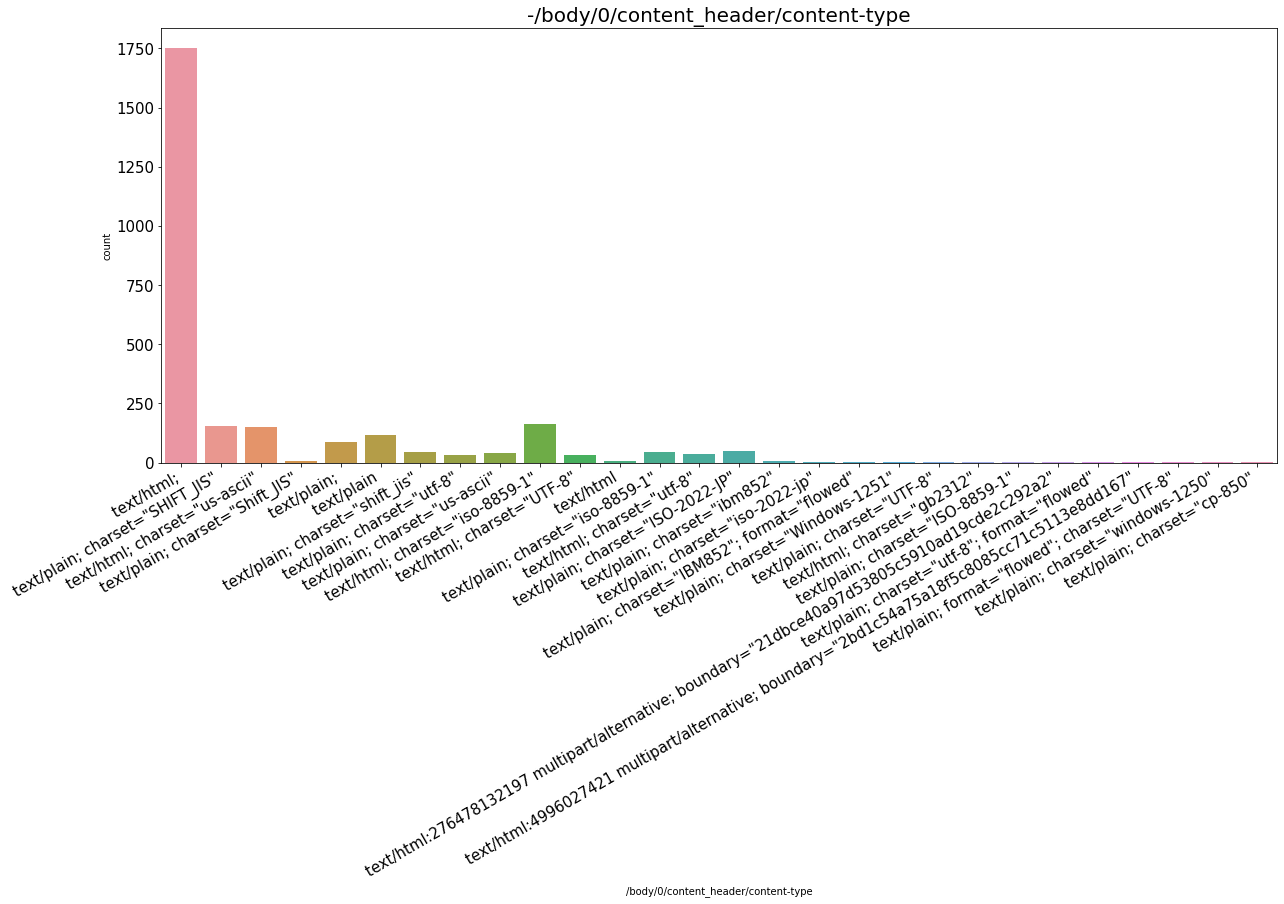

In [17]:
plt.figure(figsize=(20, 8))
plt.title('-/body/0/content_header/content-type', fontsize=20)
sns.countplot(x="/body/0/content_header/content-type", data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/body/0/content_header/content-transfer-encoding: 같은 것들끼리 통계내주기

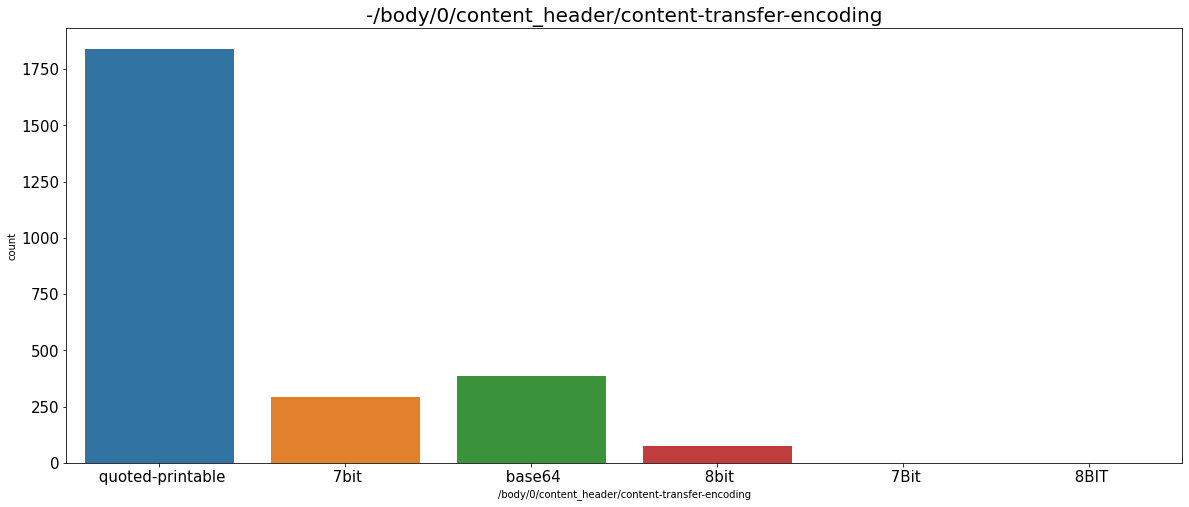

In [6]:
plt.figure(figsize=(20, 8))
plt.title('-/body/0/content_header/content-transfer-encoding', fontsize=20)
sns.countplot(x="/body/0/content_header/content-transfer-encoding", data=eml_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/header/from: 중복되는 값만 나오게 하기

In [15]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
from_df=eml_df['/header/from'].value_counts().rename_axis('from').reset_index(name='counts')
from_limit=from_df.counts>2
from_df[from_limit]

,from,counts
0,suminy@outlook.kr,243
1,yenjuy@outlook.kr,188
2,shinhoan@outlook.kr,170
3,juhan@nate.com,127
4,juyoung@gmail.com,62
...,...,...
86,junsoo@gmail.com,3
87,info@m81.410smtp.work,3
88,info@m81.501smtp.work,3
89,jinyung@yahoo.co.kr,3


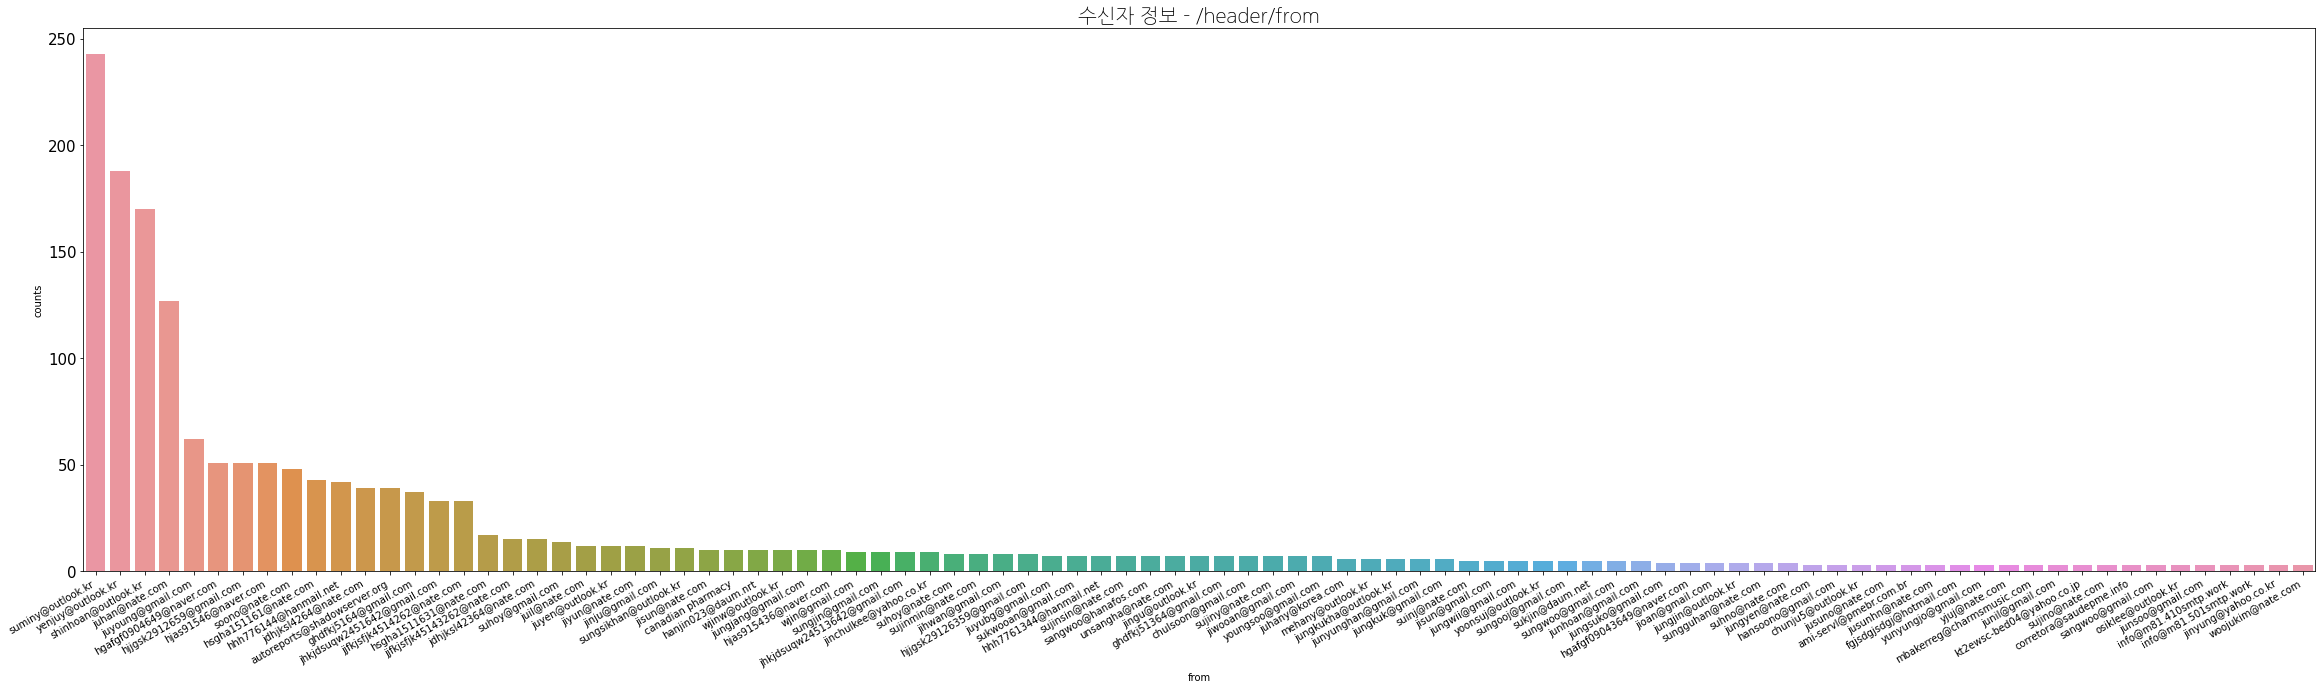

In [20]:
plt.figure(figsize=(40, 10))
plt.title('수신자 정보 - /header/from', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="from", y="counts", data=from_df[from_limit])
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

/header/to: 중복되는 값만 나오게 하기

In [21]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
to_df=eml_df['/header/to'].value_counts().rename_axis('to').reset_index(name='counts')
to_limit=to_df.counts>2

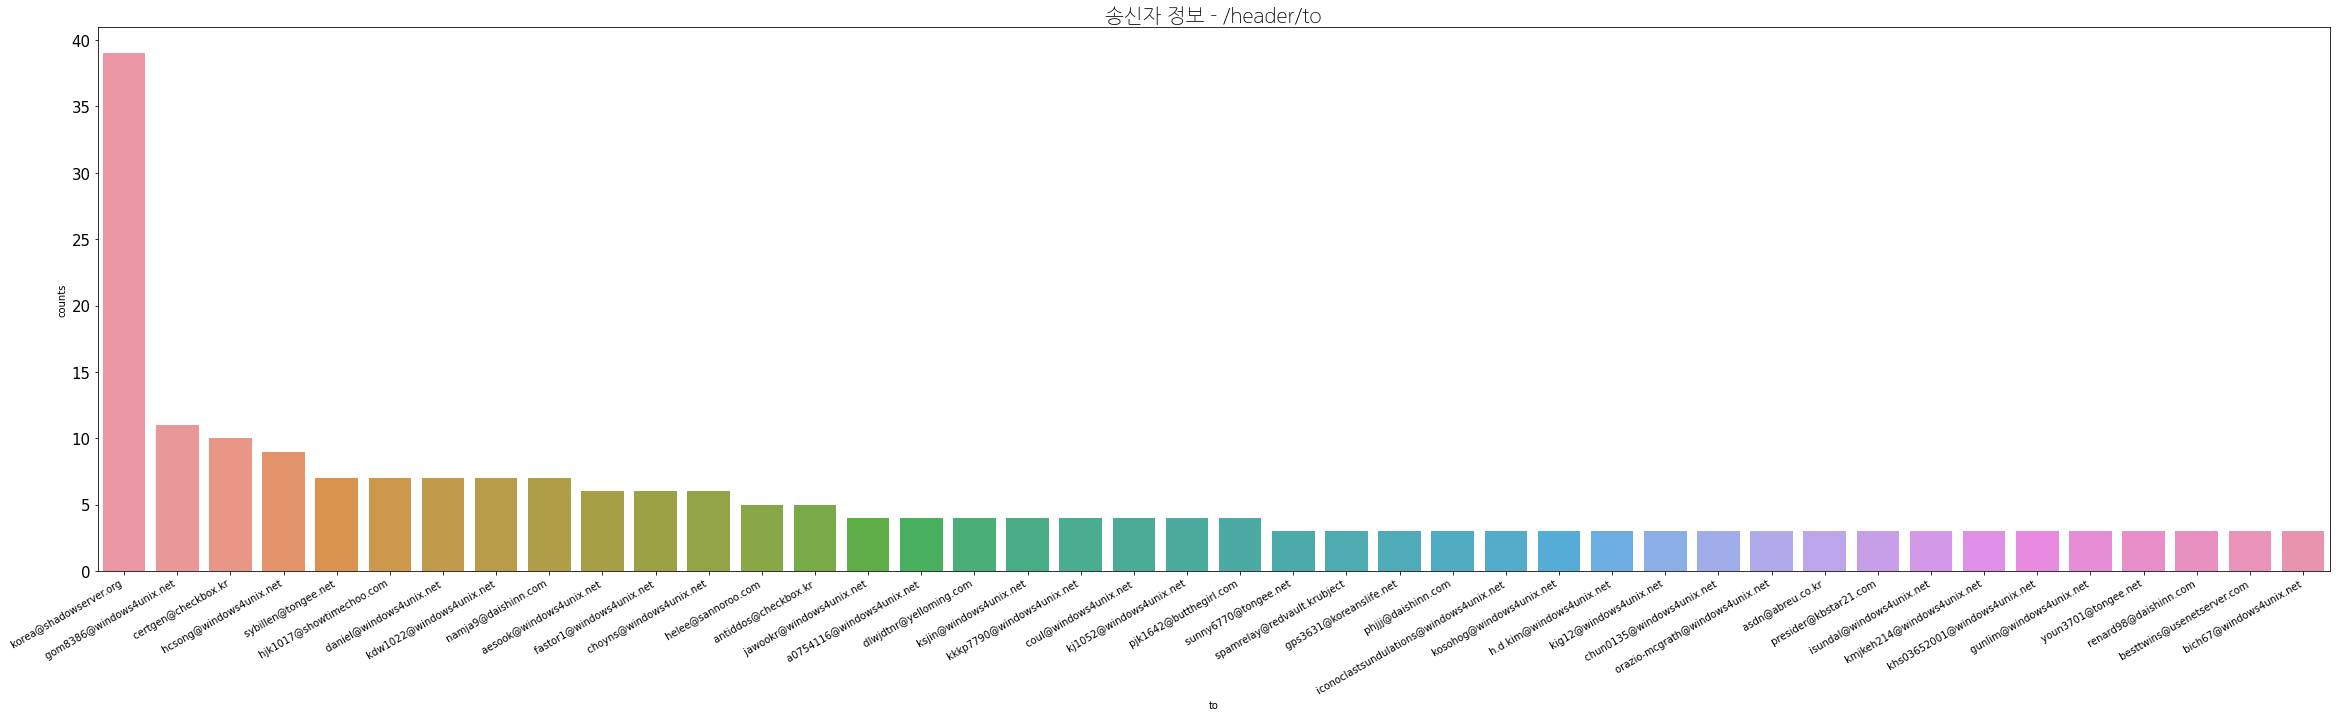

In [22]:
plt.figure(figsize=(40, 10))
plt.title('송신자 정보 - /header/to', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="to", y="counts", data=to_df[to_limit])
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=15)
plt.show()

/header/date: 뒤에 +00:00 이 부분만 비교해서 같은 것들끼리 통계내주기

In [23]:
date_types = ["/header/date"]

for date_type in date_types:
    #print(date_type)
    is_plus = eml_df[date_type].str.contains('+', na=False, regex=False)
    is_plus_and_nan = eml_df[date_type].str.contains('+', na=True, regex=False)
    
    # +hh:mm 형식 처리
    plus_series = eml_df[is_plus][date_type].str.split('+', expand=True)
    if not plus_series.empty:
        if len(plus_series.columns) != 2 and len(minus_series.columns) != 0: 
            print("**error** '+' 개수:", len(plus_series.columns))
        else:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = plus_series[1].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'+')
            eml_df.loc[is_plus, date_type+'_timezone'] = time_zone
              
    # -hh:mm 형식 처리
    minus_series = (eml_df[~is_plus_and_nan][date_type].str.split('-', expand=True))
    if not minus_series.empty:
        if len(minus_series.columns) == 4:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = minus_series[3].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'-')
            eml_df.loc[~is_plus_and_nan, date_type+'_timezone'] = time_zone
        elif len(minus_series.columns) == 2:
            # /header/header/date는 +0500, 나머지는 +05:00 형식
            time_zone = minus_series[1].str.findall("\d\d")
            time_zone = time_zone.str.join('')
            time_zone = time_zone.str.rjust(5,'-')
            eml_df.loc[~is_plus_and_nan, date_type+'_timezone'] = time_zone
        else:
            print("**error** '-' 개수: ", len(minus_ser))
                
    # null값 처리 -> 일단 시각화에 사용하기 위해 'NULL VALUE' 문자열 저장
    null_series = eml_df[date_type].isnull()
    temp_series = pd.Series(["NULL VALUE"]*len(null_series))
    eml_df.loc[null_series, date_type+"_timezone"] = temp_series

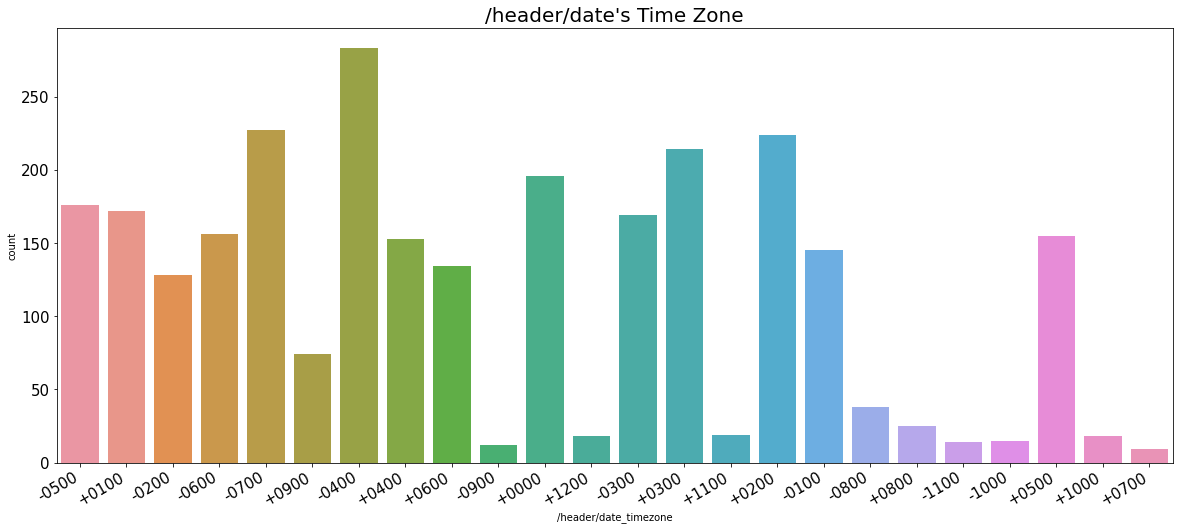

In [25]:
plt.figure(figsize=(20,8))
plt.title("/header/date's Time Zone", fontsize=20)
sns.countplot(x='/header/date_timezone', data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

last_num: 같은 것들끼리 통계 내주기

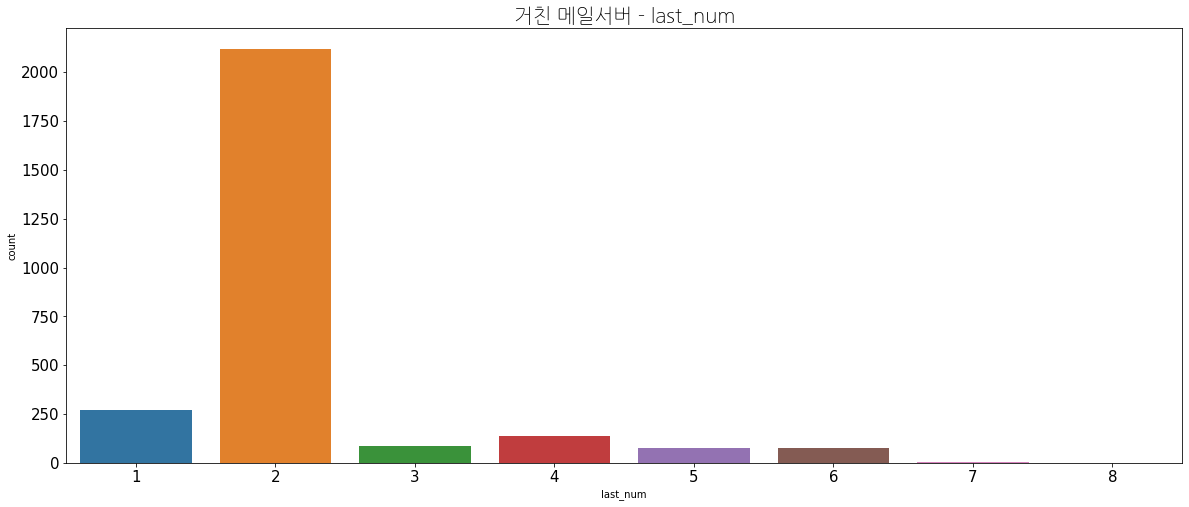

In [29]:
plt.figure(figsize=(20, 8))
plt.title('거친 메일서버 - last_num', fontsize=20, fontproperties=fontprop)
sns.countplot(x="last_num", data=eml_df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/header/received/0/with: 같은 것들끼리 통계 내주기

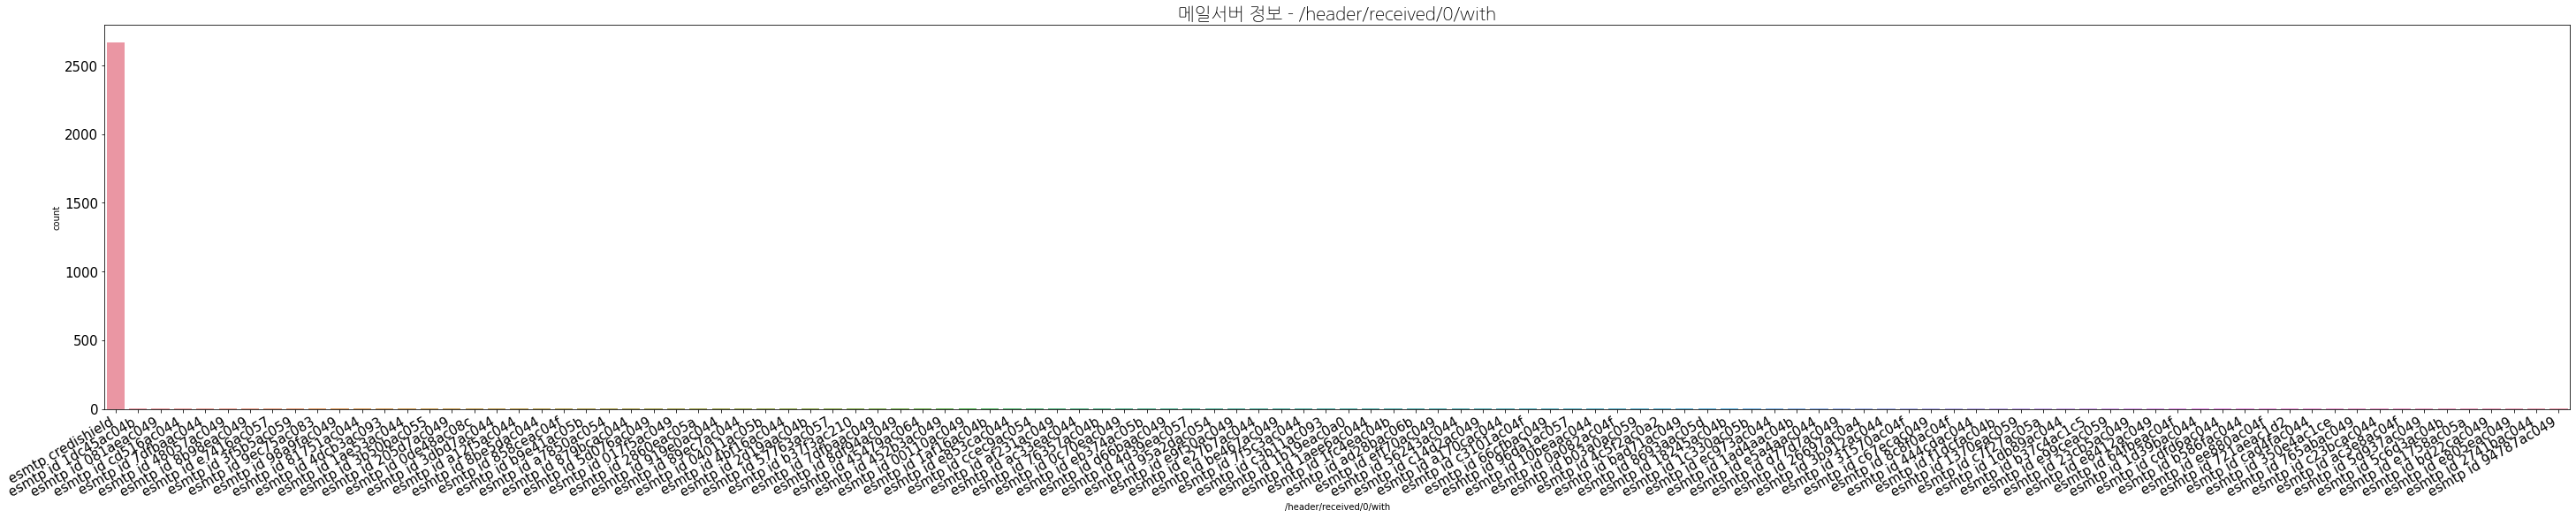

In [31]:
plt.figure(figsize=(50, 8))
plt.title('메일서버 정보 - /header/received/0/with', fontsize=20, fontproperties=fontprop)
sns.countplot(x="/header/received/0/with", data=eml_df)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [32]:
# df = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
with_df=eml_df['/header/received/0/with'].value_counts().rename_axis('with').reset_index(name='counts')
with_limit=with_df.counts>2

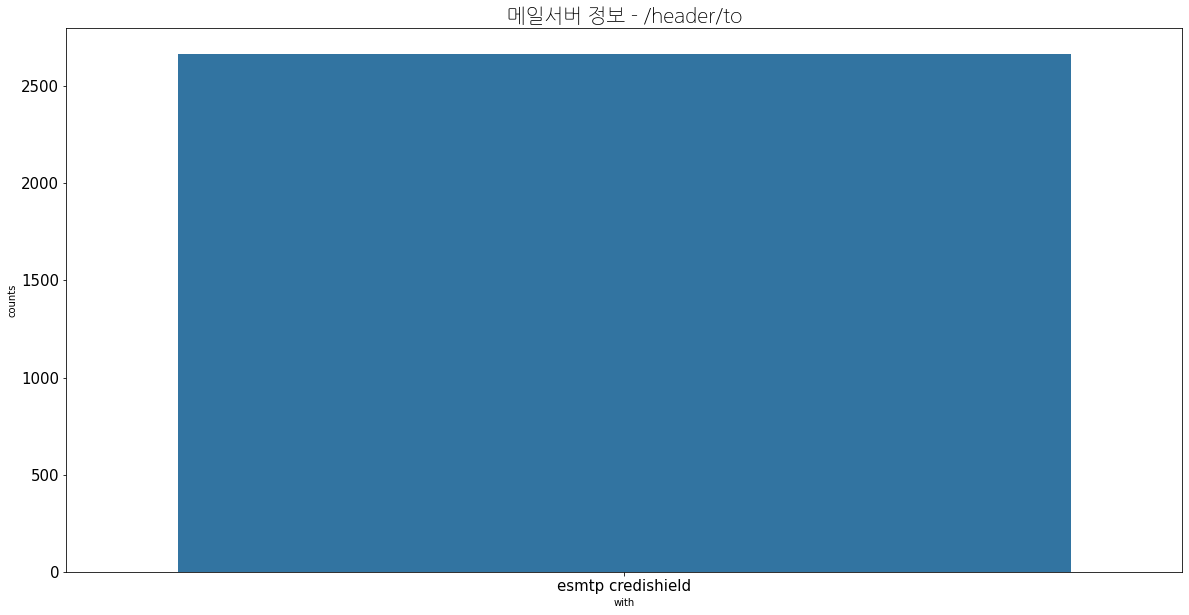

In [36]:
plt.figure(figsize=(20, 10))
plt.title('메일서버 정보 - /header/to', fontsize=20, fontproperties=fontprop)
ax = sns.barplot(x="with", y="counts", data=with_df[with_limit])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()